In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats

In [2]:
insurance=pd.read_csv("insurance.csv")

In [3]:
insurance.shape

(1338, 7)

In [4]:
insurance.sample(10)

,age,sex,bmi,children,smoker,region,charges
819,33,female,35.530,0,yes,northwest,55135.40209
906,27,male,32.585,3,no,northeast,4846.92015
213,34,female,26.730,1,no,southeast,5002.78270
1143,39,male,32.340,2,no,southeast,6338.07560
942,18,female,40.185,0,no,northeast,2217.46915
694,27,female,34.800,1,no,southwest,3577.99900
245,54,male,30.020,0,no,northwest,24476.47851
1195,19,female,27.930,3,no,northwest,18838.70366
253,27,male,30.300,3,no,southwest,4260.74400
252,54,male,34.210,2,yes,southeast,44260.74990


In [5]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
insurance.describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [9]:
insurance["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [10]:
insurance["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [11]:
insurance["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [12]:
insurance["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

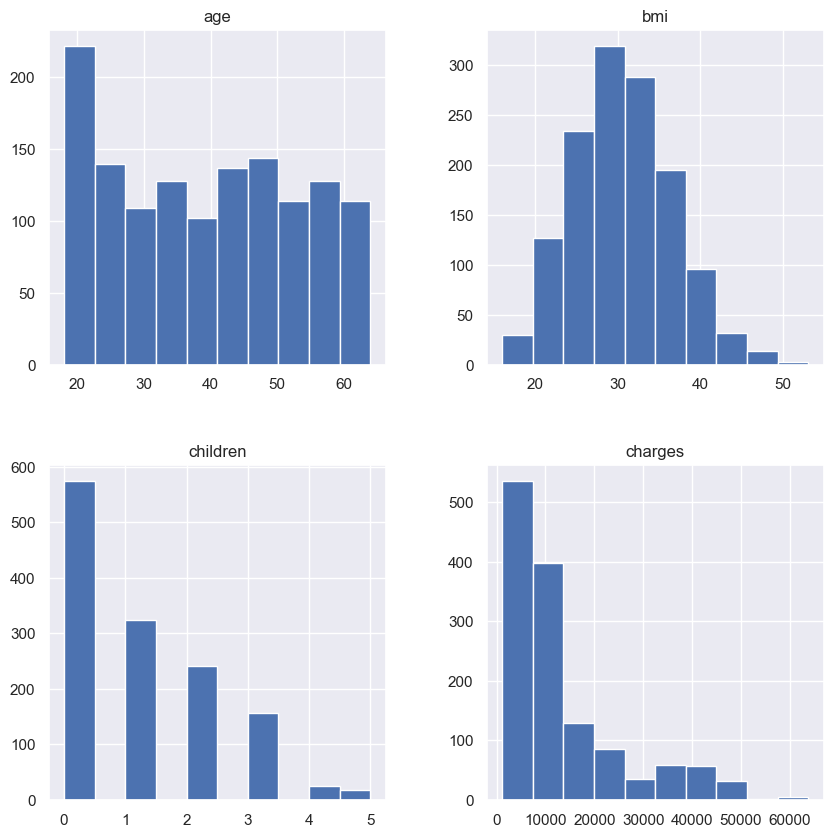

In [13]:
insurance.hist(figsize=(10,10))
plt.show()
## age and bmi looks normally distributed but not charges

In [14]:
insurance.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

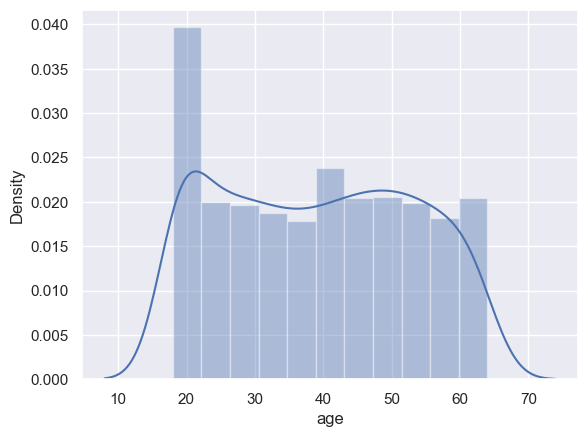

In [15]:
sns.distplot(insurance["age"])
plt.show()

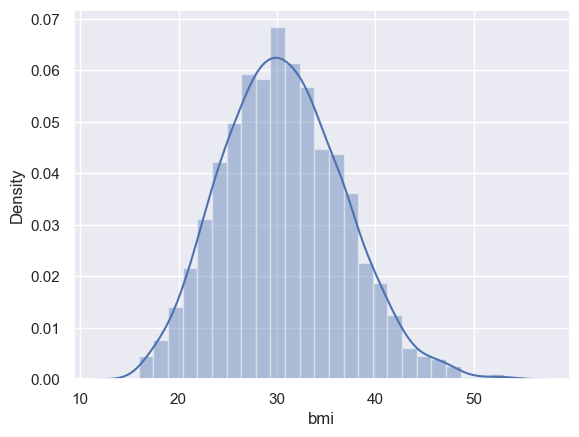

In [16]:
sns.distplot(insurance["bmi"])
plt.show()

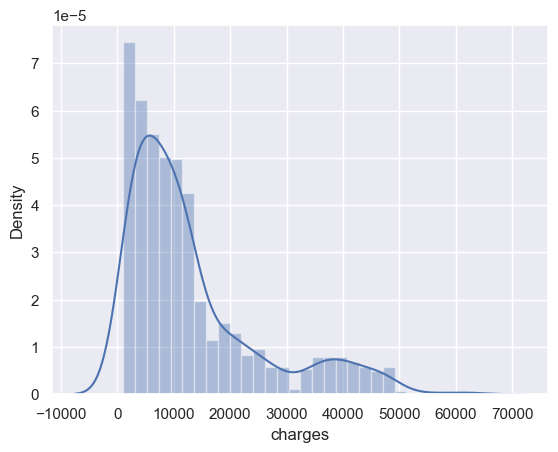

In [17]:
sns.distplot(insurance["charges"])
plt.show()

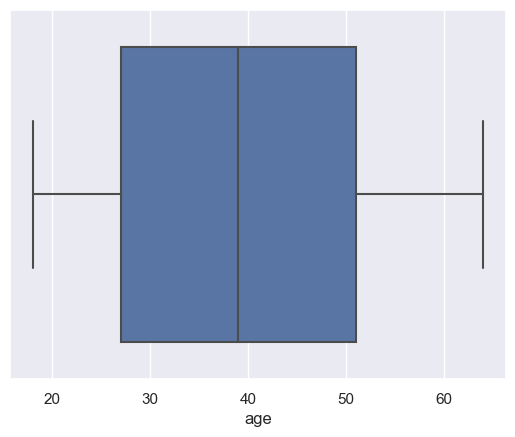

In [18]:
sns.boxplot(x="age", data=insurance)
plt.show()

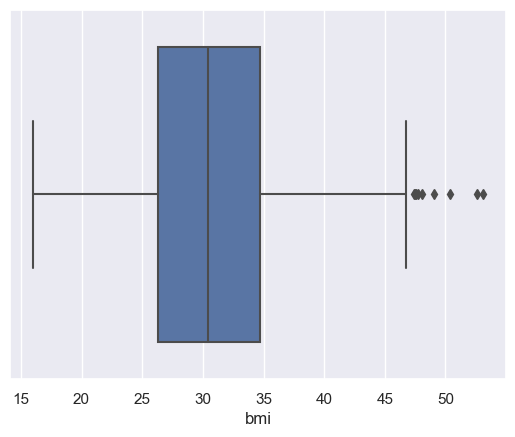

In [19]:
sns.boxplot(x="bmi", data=insurance)
plt.show()

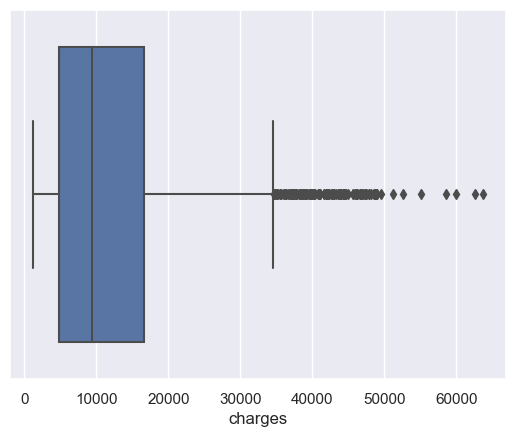

In [20]:
sns.boxplot(x="charges", data=insurance)
plt.show()

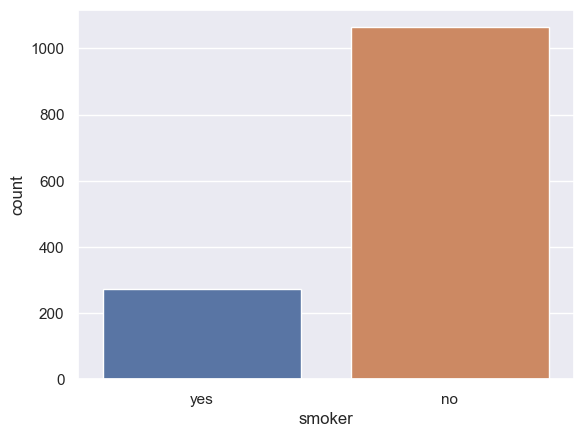

In [21]:
sns.countplot(x="smoker", data=insurance)
plt.show()

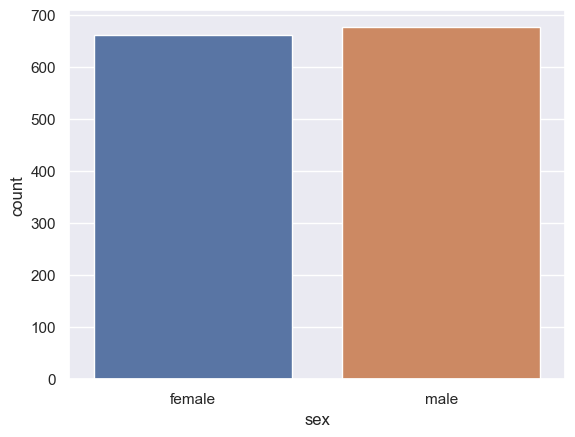

In [22]:
sns.countplot(x="sex", data=insurance)
plt.show()

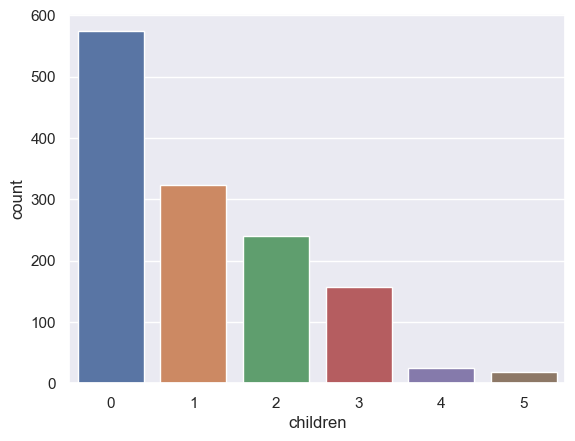

In [23]:
sns.countplot(x="children", data=insurance)
plt.show()

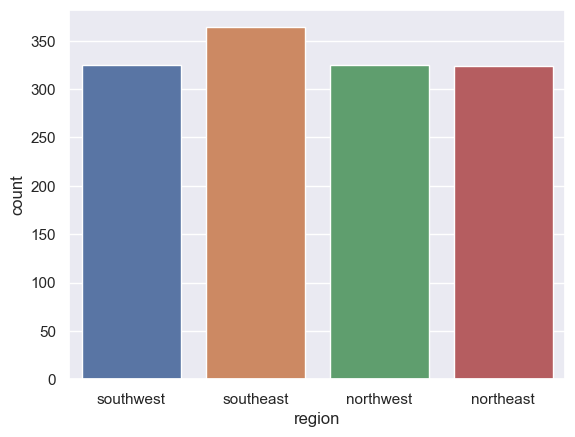

In [24]:
sns.countplot(x="region", data=insurance)
plt.show()

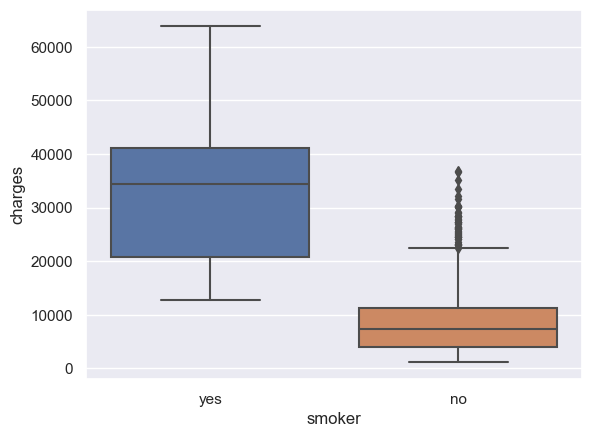

In [25]:
sns.boxplot(x="smoker", y="charges", data=insurance)
plt.show()

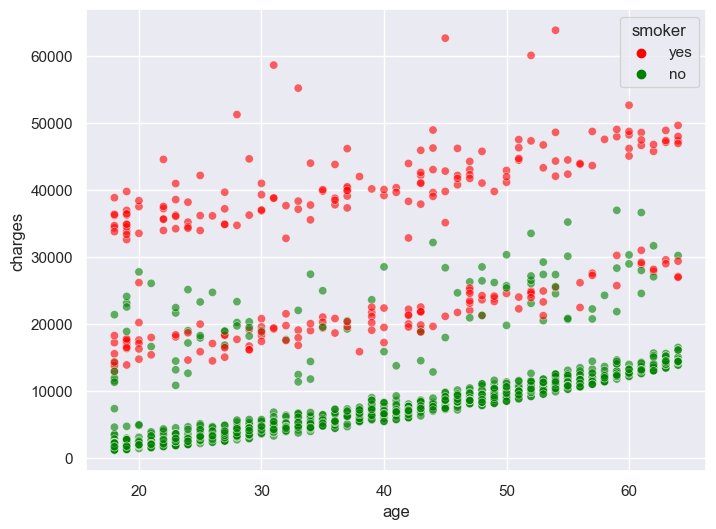

In [26]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=insurance.age, y=insurance.charges, hue=insurance.smoker,palette=["red","green"], alpha=0.6)
plt.show()

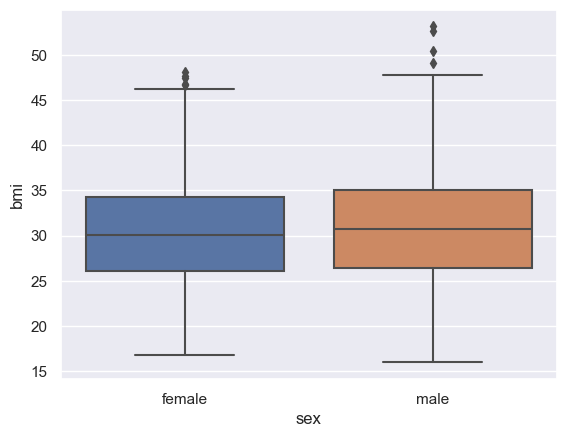

In [27]:
sns.boxplot(x="sex", y="bmi", data=insurance)
plt.show()

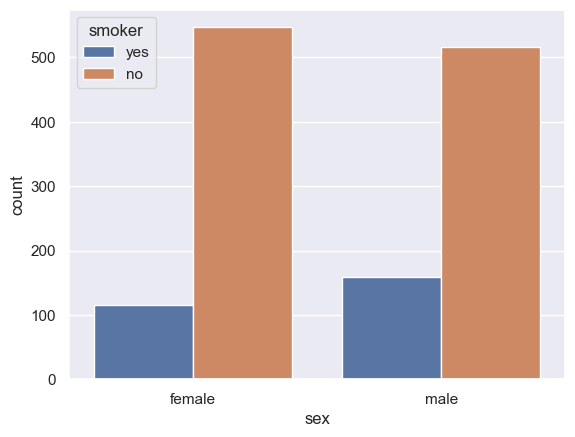

In [28]:
sns.countplot(x="sex" ,hue="smoker", data=insurance)
plt.show()

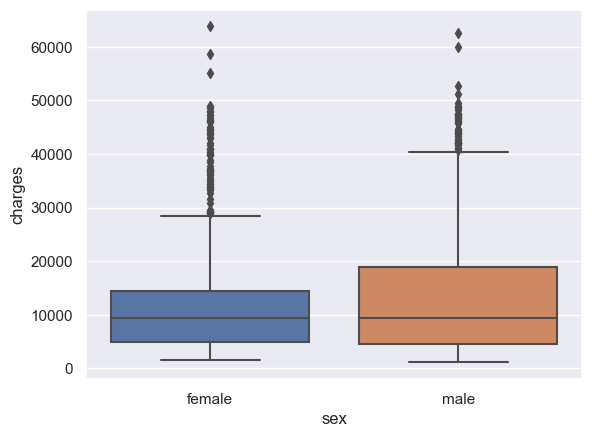

In [29]:
sns.boxplot(x="sex", y="charges", data=insurance)
plt.show()

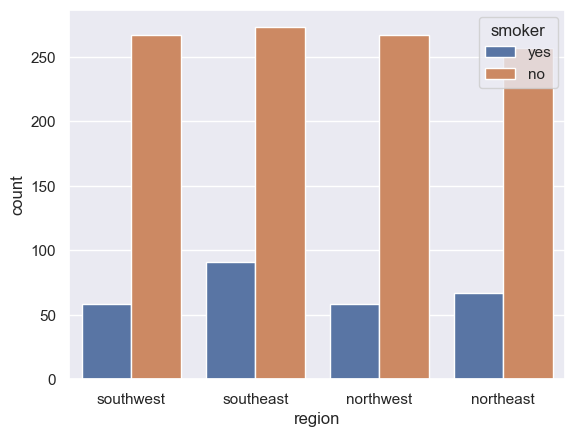

In [30]:
sns.countplot(x="region" ,hue="smoker", data=insurance)
plt.show()

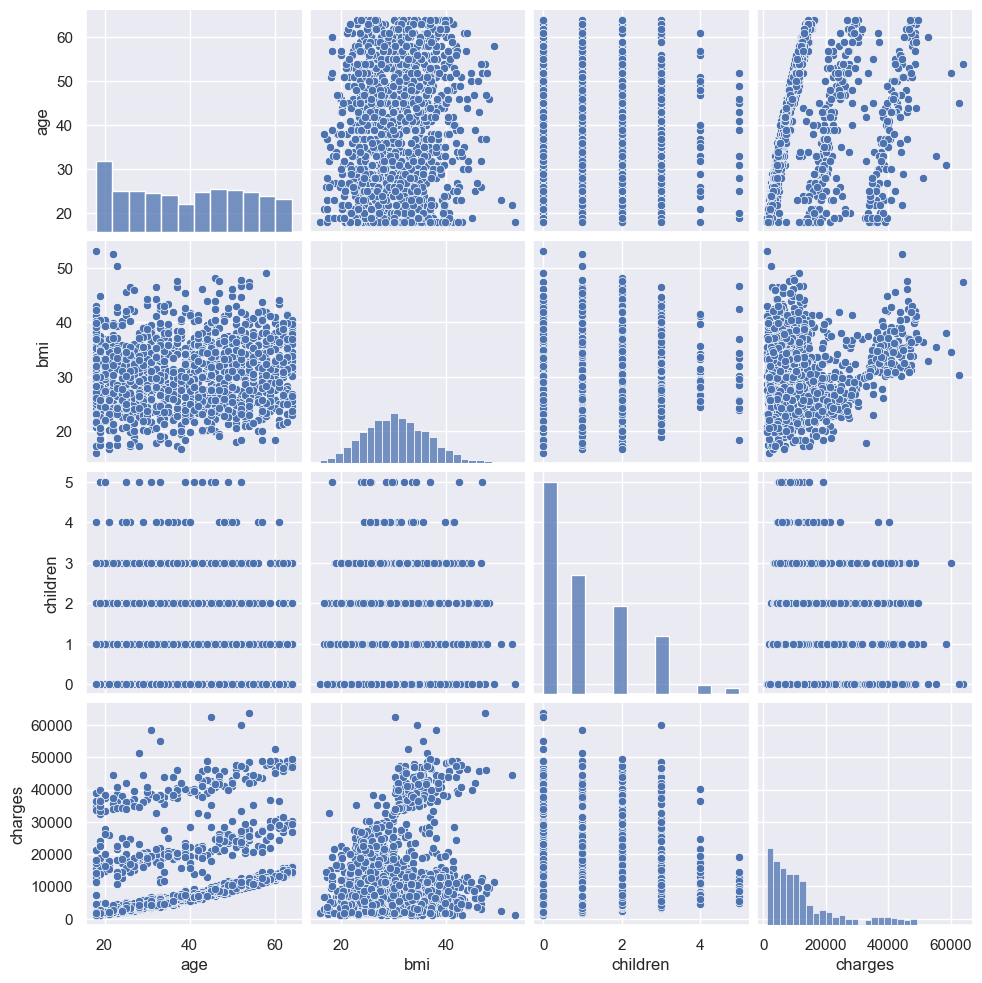

In [31]:
sns.pairplot(insurance)
plt.show()

In [34]:
insurance_corr= insurance.corr()
insurance_corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


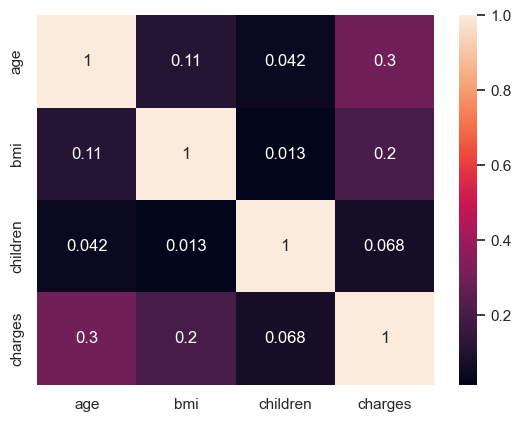

In [35]:
sns.heatmap(insurance_corr, annot=True)
plt.show()

In [ ]:
### Hypothesis testing

In [36]:
# T-test to check dependency of smoking on charges
Ho = "Charges of smoker and non-smoker are same"   # Stating the Null Hypothesis
Ha = "Charges of smoker and non-smoker are not the same"   # Stating the Alternate Hypothesis

x = np.array(insurance[insurance.smoker == 'yes'].charges)  # Selecting charges corresponding to smokers as an array
y = np.array(insurance[insurance.smoker == 'no'].charges) # Selecting charges corresponding to non-smokers as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

Charges of smoker and non-smoker are not the same as the p_value (8.271435842179102e-283) < 0.05


In [63]:
# T-test to check dependency of sex on bmi
Ho = "Bmi of male and female is same.. Or we can say gender has no effect on BMI"   # Stating the Null Hypothesis
Ha = "Bmi of male and female is not the same.. OR we can say gender has an effect on BMI"   # Stating the Alternate Hypothesis

x = np.array(insurance[insurance.sex == 'male'].bmi)  # Selecting bmi corresponding to male as an array
y = np.array(insurance[insurance.sex == 'female'].bmi) # Selecting bmi corresponding to female as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

Bmi of male and female is same.. Or we can say gender has no effect on BMI as the p_value (0.08997637178984932) > 0.05


In [37]:
insurance["sex"].unique()

array(['female', 'male'], dtype=object)

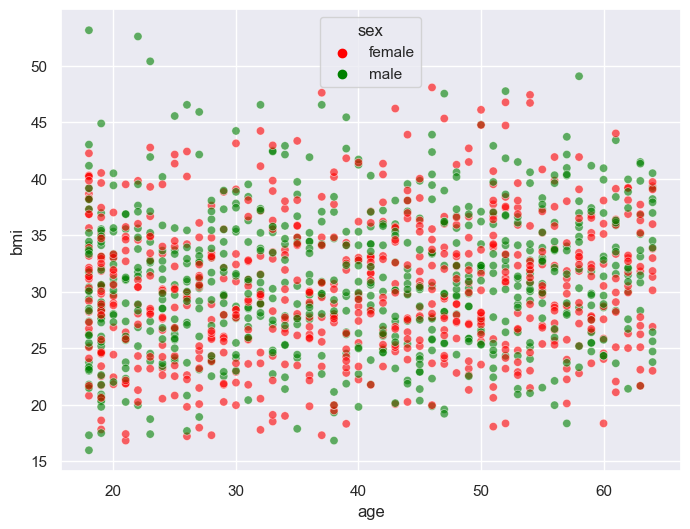

In [38]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=insurance.age, y=insurance.bmi, hue=insurance.sex,palette=["red","green"], alpha=0.6)
plt.show()

## is the distribution of BMI across women with no children, one children, and two children, the same?

In [39]:
import copy

In [40]:
### if number of samples are greater than 2, we should go for anova test
Ho= "No. of children has no effect on BMI" ## stating null hypothesis
Ha="No. of children has an effect on BMI" ## stating null hypothesis

female_df=copy.deepcopy(insurance[insurance["sex"]=="female"])

zero=female_df[female_df.children==0]["bmi"]
one=female_df[female_df.children==1]["bmi"]
two=female_df[female_df.children==2]["bmi"]

f_stat,p_value=stats.f_oneway(zero,one,two)

if p_value<0.05:## setting our significance level at 5%
    print(f'{Ha} as p_value ({p_value.round(3)}) is < 0.05') ## reject null hypothesis as p value is less than 0.05
else:
    print(f'{Ho} as p_value ({p_value.round(3)}) is > 0.05')  ## accept null hypothesis as p value is greater than 0.05

No. of children has no effect on BMI as p_value (0.716) is > 0.05
